Libraries Import

In [1]:
!pip install --upgrade kneed

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib as mtp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt   
import seaborn as sns
from xgboost import XGBRegressor
import matplotlib.pyplot as plot

In [3]:
ds=pd.read_csv("Visibility_data.csv")

EDA

In [4]:
ds

DATE  VISIBILITY  DRYBULBTEMPF  WETBULBTEMPF  \
0      2010-01-01 00:51:00         6.0          33.0          32.0   
1      2010-01-01 01:51:00         6.0          33.0          33.0   
2      2010-01-01 02:51:00         5.0          33.0          33.0   
3      2010-01-01 03:51:00         5.0          33.0          33.0   
4      2010-01-01 04:51:00         5.0          33.0          32.0   
...                    ...         ...           ...           ...   
75078  2018-07-27 18:51:00        10.0          76.0          73.0   
75079  2018-07-27 19:51:00         4.0          69.0          69.0   
75080  2018-07-27 20:51:00        10.0          71.0          70.0   
75081  2018-07-27 21:51:00        10.0          72.0          71.0   
75082  2018-07-27 22:51:00        10.0          72.0          71.0   

       DewPointTempF  RelativeHumidity  WindSpeed  WindDirection  \
0               31.0              92.0        0.0            0.0   
1               32.0              96.0        0.0            0.0   
2               32.0              96.0        0.0            0.0   
3               32.0              96.0        0.0            0.0   
4               31.0              92.0        0.0            0.0   
...              ...               ...        ...            ...   
75078           72.0              88.0        3.0          230.0   
75079           69.0             100.0       13.0           40.0   
75080           70.0              96.0        0.0            0.0   
75081           70.0              94.0        5.0           50.0   
75082           71.0              97.0        0.0            0.0   

       StationPressure  SeaLevelPressure  Precip  
0                29.97             29.99    0.01  
1                29.97             29.99    0.02  
2                29.97             29.99    0.02  
3                29.95             29.97    0.02  
4                29.93             29.96    0.02  
...                ...               ...     ...  
75078            30.00             30.02    0.00  
75079            29.99             30.01    1.16  
75080            30.02             30.04    0.01  
75081            30.00             30.02    0.01  
75082            30.01             30.03    0.00  

[75083 rows x 11 columns]

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  float64
 3   WETBULBTEMPF      75083 non-null  float64
 4   DewPointTempF     75083 non-null  float64
 5   RelativeHumidity  75083 non-null  float64
 6   WindSpeed         75083 non-null  float64
 7   WindDirection     75083 non-null  float64
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(10), object(1)
memory usage: 6.3+ MB


In [6]:
ds.isnull().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

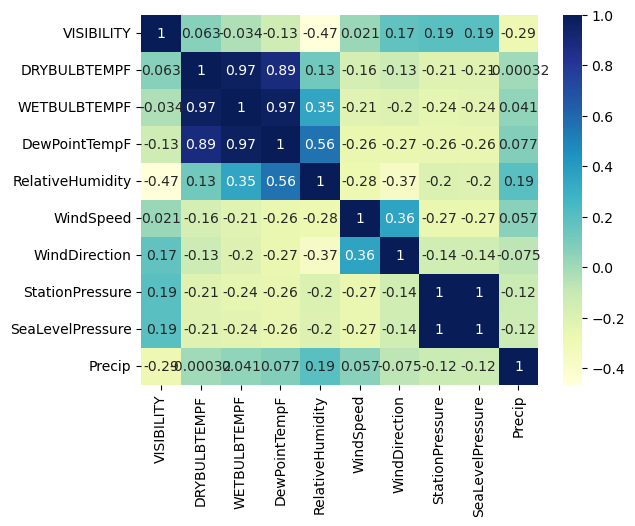

In [7]:
df_plot = sns.heatmap(ds.corr(), cmap="YlGnBu", annot=True) 

In [8]:
ds=ds.drop(['DATE','Precip','WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

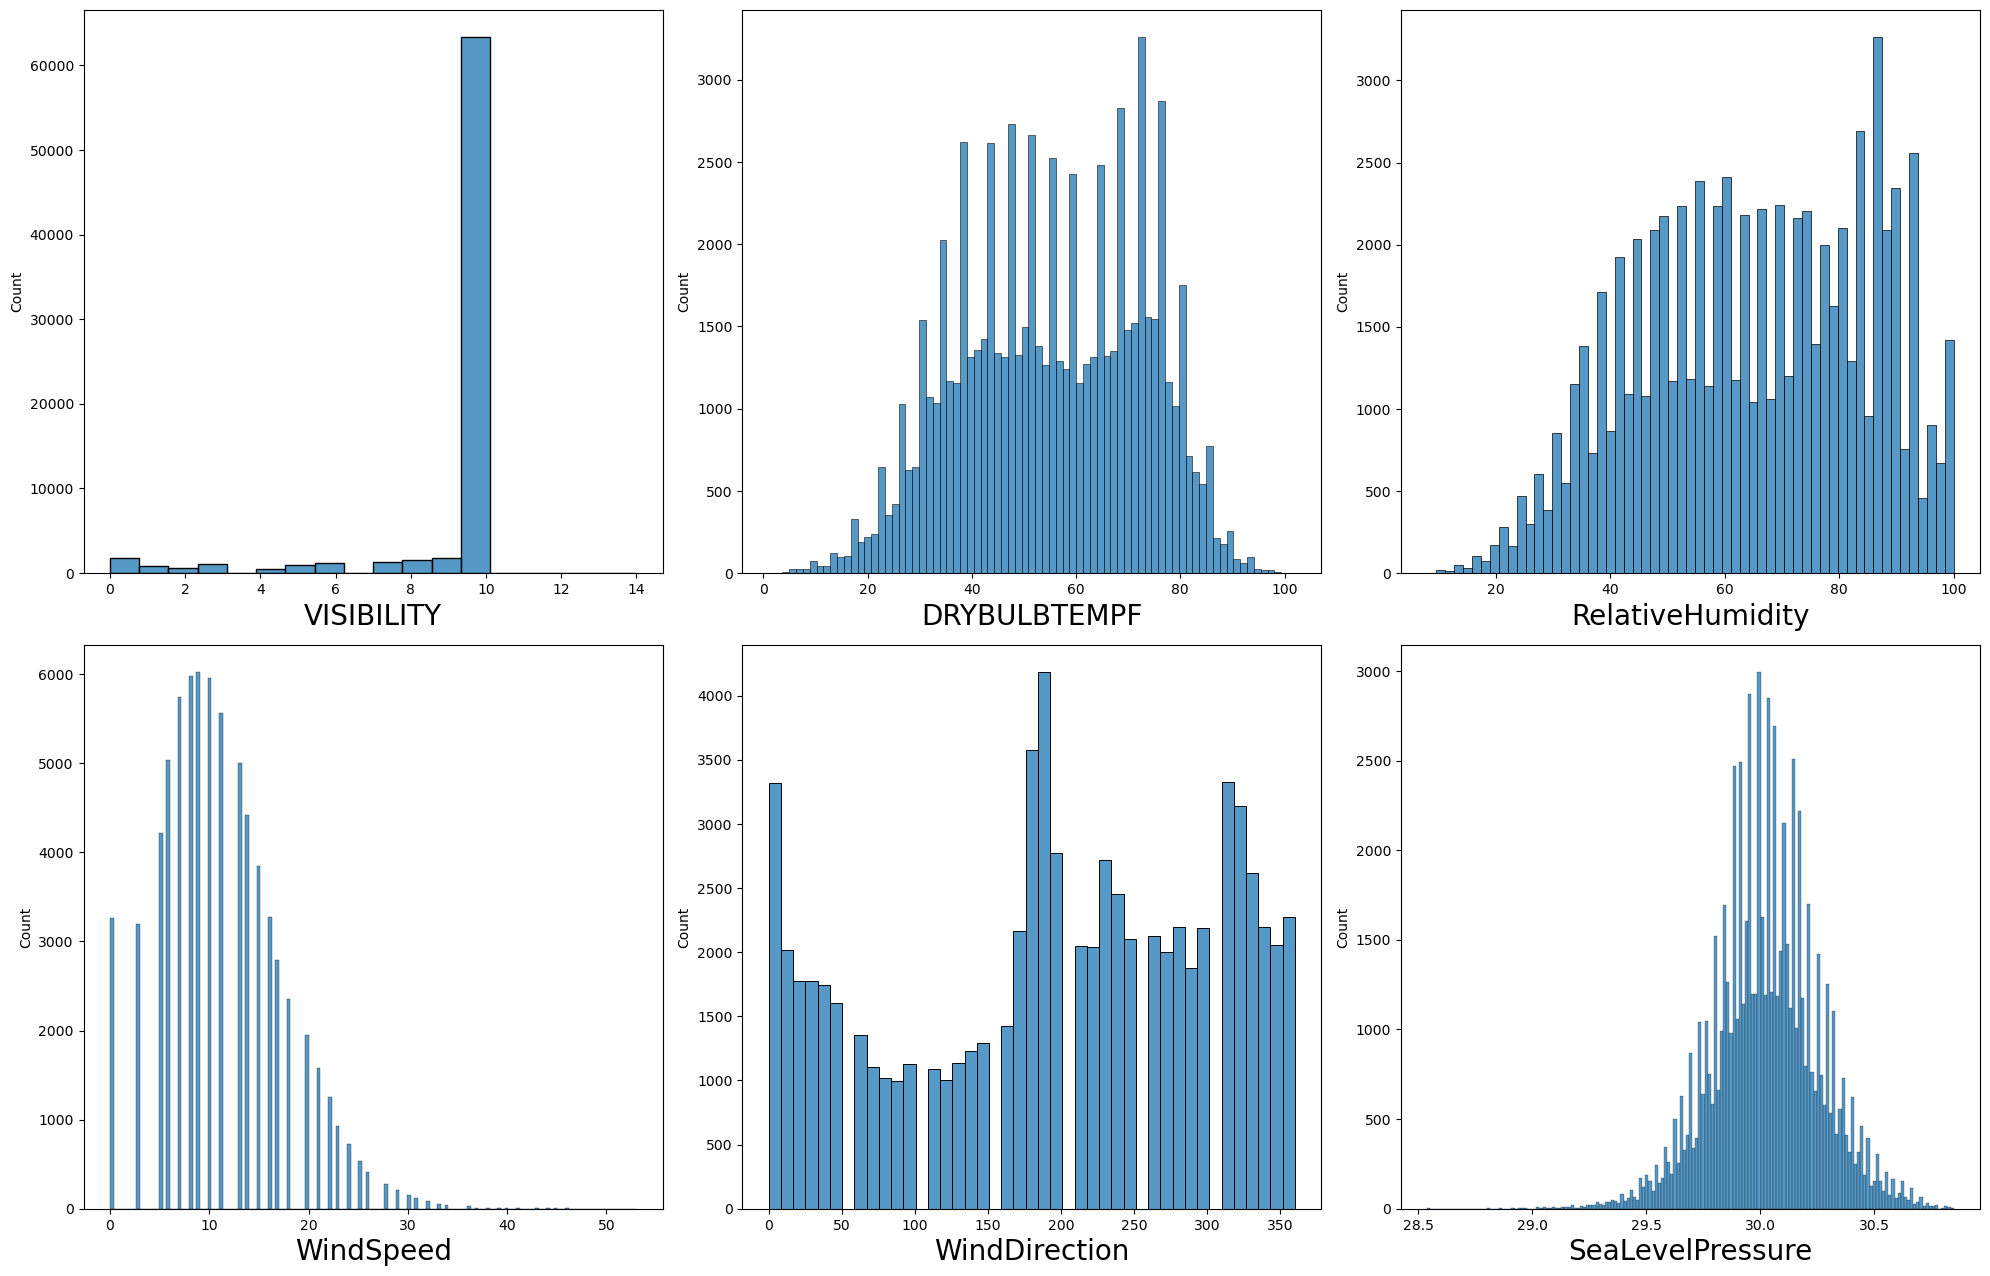

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in ds.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(ds[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
X = ds.drop(['VISIBILITY'],axis=1)
y = ds['VISIBILITY']

In [11]:
import pandas as pd

# Assuming you have a pandas DataFrame called 'ds' with numerical columns

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a multiplier to adjust the range for outlier detection (e.g., 1.5 or 3)
multiplier = 1.5

# Create a boolean mask to identify the outliers
outlier_mask = (X < (Q1 - multiplier * IQR)) | (X > (Q3 + multiplier * IQR))

# Remove the outliers from the DataFrame
clean_ds = X[~outlier_mask.any(axis=1)]

# The resulting 'clean_ds' DataFrame will have the outliers removed
X=clean_ds

In [12]:
# scaler = StandardScaler()

# X = scaler.fit_transform(X)
# X = pd.DataFrame(X,columns=clean_ds.columns)

In [13]:
X

DRYBULBTEMPF  RelativeHumidity  WindSpeed  WindDirection  \
0              33.0              92.0        0.0            0.0   
1              33.0              96.0        0.0            0.0   
2              33.0              96.0        0.0            0.0   
3              33.0              96.0        0.0            0.0   
4              33.0              92.0        0.0            0.0   
...             ...               ...        ...            ...   
75078          76.0              88.0        3.0          230.0   
75079          69.0             100.0       13.0           40.0   
75080          71.0              96.0        0.0            0.0   
75081          72.0              94.0        5.0           50.0   
75082          72.0              97.0        0.0            0.0   

       SeaLevelPressure  
0                 29.99  
1                 29.99  
2                 29.99  
3                 29.97  
4                 29.96  
...                 ...  
75078             30.02  
75079             30.01  
75080             30.04  
75081             30.02  
75082             30.03  

[72701 rows x 5 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

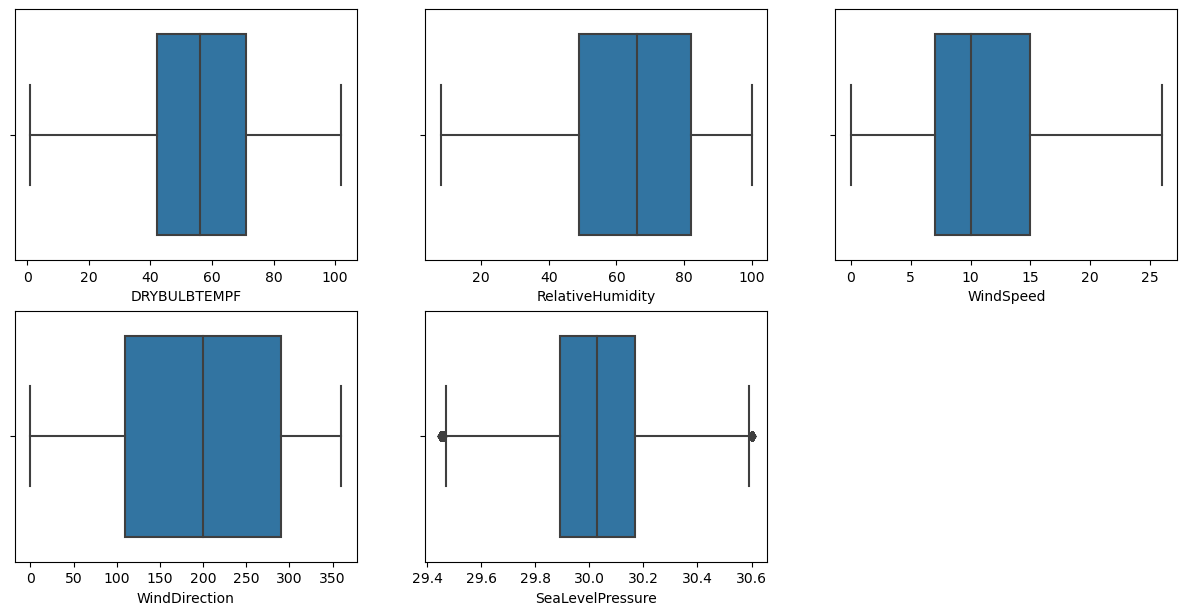

In [14]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

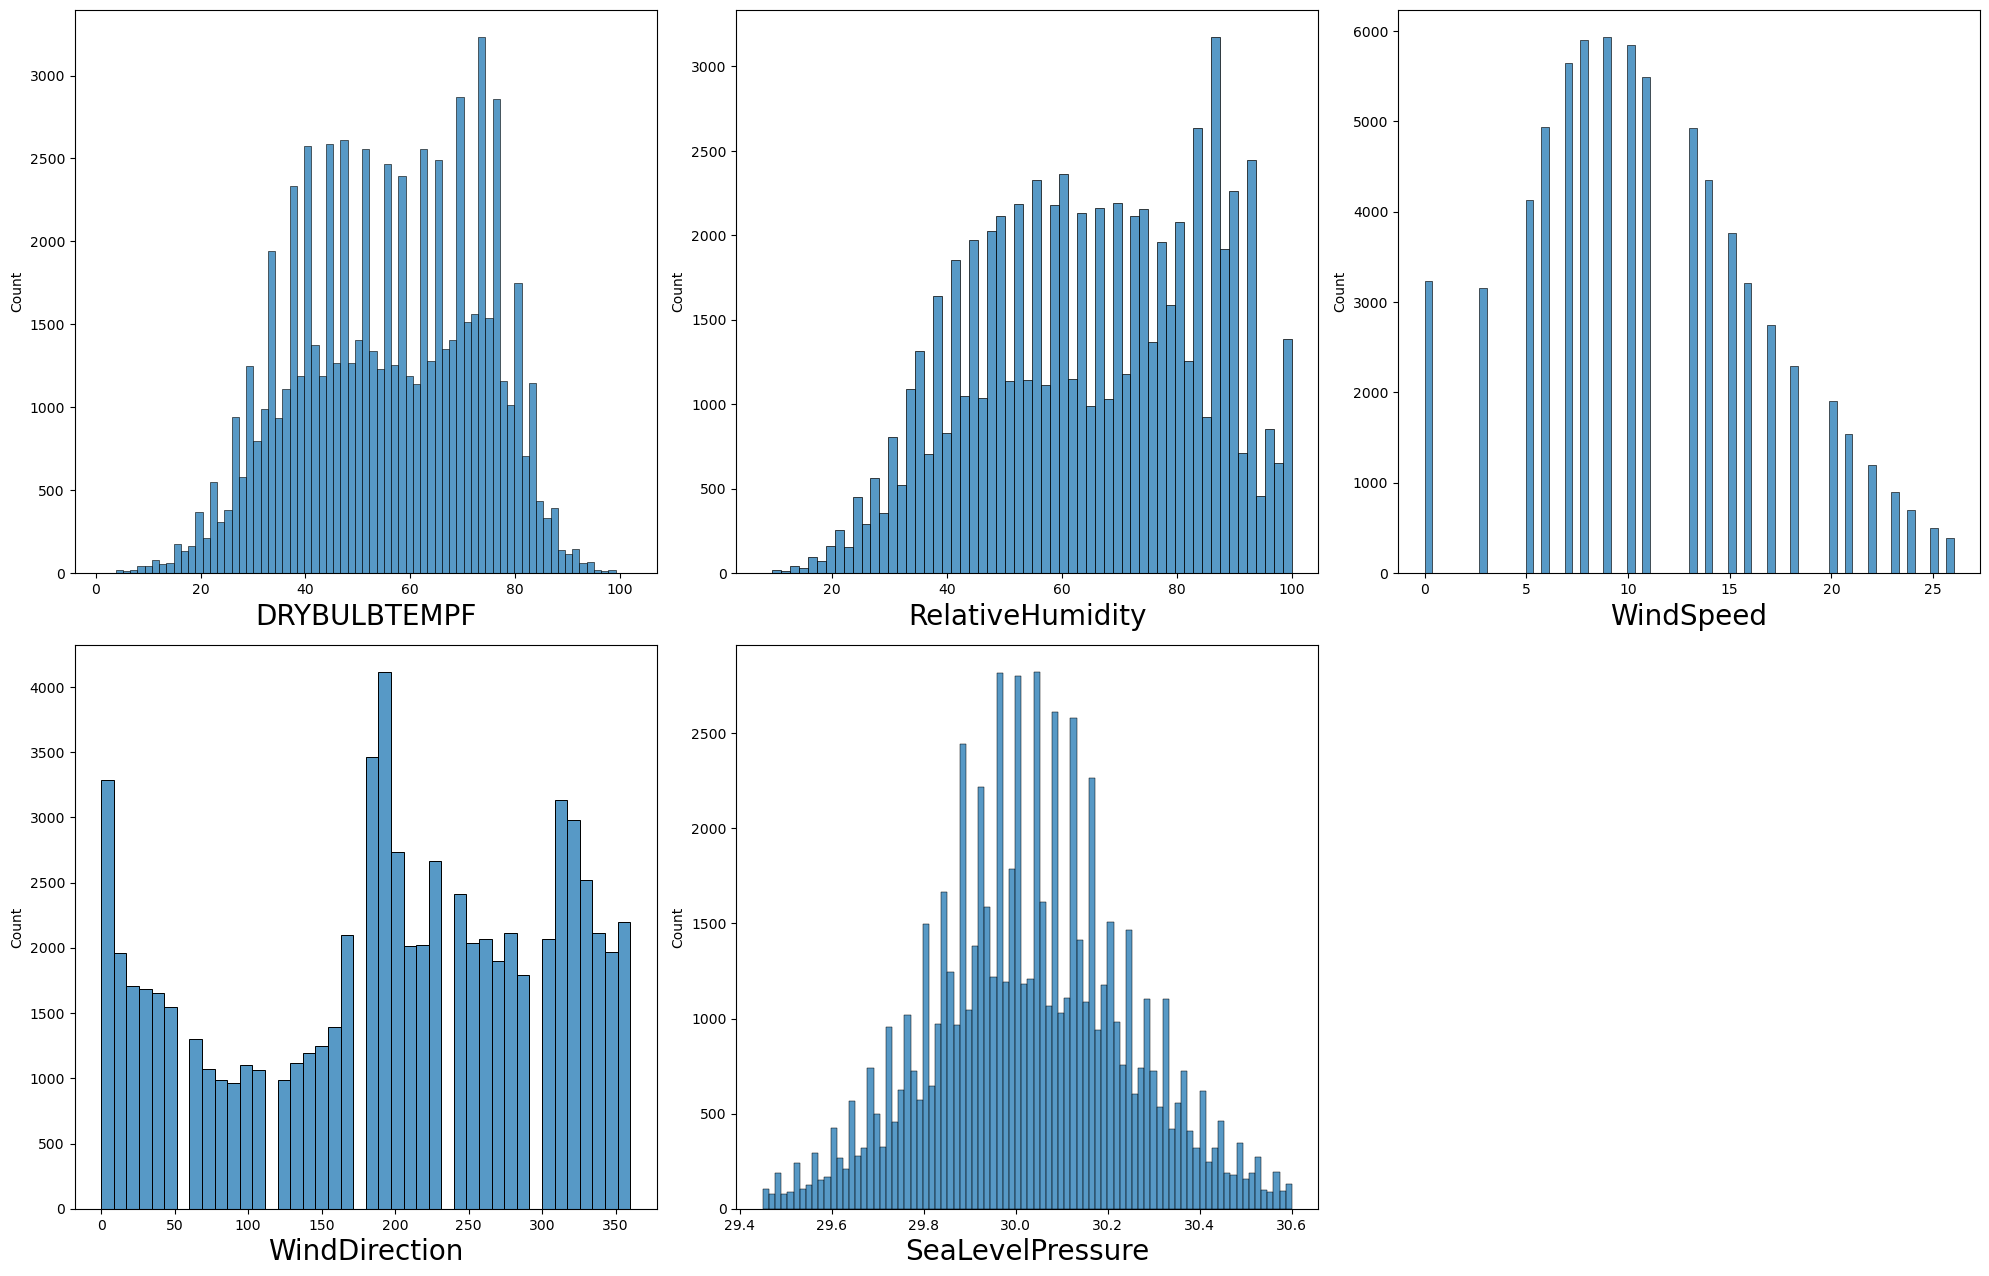

In [15]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(X[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
ds

VISIBILITY  DRYBULBTEMPF  RelativeHumidity  WindSpeed  WindDirection  \
0             6.0          33.0              92.0        0.0            0.0   
1             6.0          33.0              96.0        0.0            0.0   
2             5.0          33.0              96.0        0.0            0.0   
3             5.0          33.0              96.0        0.0            0.0   
4             5.0          33.0              92.0        0.0            0.0   
...           ...           ...               ...        ...            ...   
75078        10.0          76.0              88.0        3.0          230.0   
75079         4.0          69.0             100.0       13.0           40.0   
75080        10.0          71.0              96.0        0.0            0.0   
75081        10.0          72.0              94.0        5.0           50.0   
75082        10.0          72.0              97.0        0.0            0.0   

       SeaLevelPressure  
0                 29.99  
1                 29.99  
2                 29.99  
3                 29.97  
4                 29.96  
...                 ...  
75078             30.02  
75079             30.01  
75080             30.04  
75081             30.02  
75082             30.03  

[75083 rows x 6 columns]

Modal training

In [17]:
column_names=ds.columns.values

In [18]:
column_names

array(['VISIBILITY', 'DRYBULBTEMPF', 'RelativeHumidity', 'WindSpeed',
       'WindDirection', 'SeaLevelPressure'], dtype=object)

In [19]:
Y=ds["VISIBILITY"]
z=Y

In [20]:
print(z)

0         6.0
1         6.0
2         5.0
3         5.0
4         5.0
         ... 
75078    10.0
75079     4.0
75080    10.0
75081    10.0
75082    10.0
Name: VISIBILITY, Length: 75083, dtype: float64


In [21]:
X=ds.drop(["VISIBILITY"],axis=1)

Clustering

In [22]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
  kmeans.fit(X) # fitting the data to the KMeans Algorithm
  wcss.append(kmeans.inertia_)
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
s=kn.knee


In [23]:
import os
original_path=os.getcwd()
for i in range(s):

# Define the folder path
    folder_path=os.getcwd() + "/" + str(i)
    print(folder_path)

# Check if the folder already exists
    if not os.path.exists(folder_path):
    # If the folder doesn't exist, create it
        os.makedirs(folder_path)


C:\Users\Lakshita\Desktop\Visibility-main/0
C:\Users\Lakshita\Desktop\Visibility-main/1
C:\Users\Lakshita\Desktop\Visibility-main/2


In [24]:
kmeans = KMeans(n_clusters=s, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)  

In [25]:
cluster=y_predict

In [26]:
print(Y.shape)
print(cluster.shape)

(75083,)
(75083,)


In [27]:

z=pd.DataFrame(z)
cluster = pd.DataFrame(cluster)
z["Cluster"]=cluster
print(type(cluster))
print(type(z))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
X["Cluster"]=cluster

In [29]:
column_names=X.columns.values

In [30]:
column_names

array(['DRYBULBTEMPF', 'RelativeHumidity', 'WindSpeed', 'WindDirection',
       'SeaLevelPressure', 'Cluster'], dtype=object)

In [31]:
def randomforest_():
    global clf
    clf=RandomForestRegressor()
    param_grid = {"n_estimators": [10]#, 50, 100]
                , "criterion": ['squared_error']#, 'absolute_error', 'friedman_mse', 'poisson'],
                               ,"max_depth": range(2, 3, 1), "max_features": ['sqrt']}#,'log2']}
    #clf=RandomForestRegressor()
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
    grid.fit(X_train, y_train)

    #extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']

    #creating a new model with the best parameters

    clf = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion,
                                    max_depth=max_depth, max_features=max_features)
    # training the mew model
    clf.fit(X_train, y_train)
    predict_clf=clf.predict(X_test)
    global randomForest_error
    randomForest_error = r2_score(y_test,predict_clf)
    return clf

In [32]:
def xg_boost_():
    param_grid_xgboost = {

    'learning_rate': [0.5, 0.1]#, 0.01, 0.001],
    ,'max_depth': [3, 5]#, 10, 20],
    ,'n_estimators': [10, 50]#, 100, 200]
    }
    xgb1 = XGBRegressor()
    # Creating an object of the Grid Search class
    grid= GridSearchCV(#XGBRegressor(objective='reg:squarederror'),
        xgb1,
                       param_grid_xgboost, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    learning_rate = grid.best_params_['learning_rate']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']
    print(learning_rate,max_depth,n_estimators)
    print(grid.best_params_)

  # creating a new model with the best parameters
    xgb =XGBRegressor(
    max_depth=max_depth,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    verbosity=1)#,
    #objective='reg:squarederror')
  # training the mew model
    xgb.fit(X_train, y_train)
    predict_xgb=xgb.predict(X_test)
    global xgb_error
    xgb_error = r2_score(y_test,predict_xgb)
    return xgb

In [33]:
def decession_tree_():
    param_grid_decisionTree = {'criterion': ['squared_error', 'friedman_mse',],
                                'max_depth': [5, 10]#, 15, 20, 25, 30],
                                ,'max_features': [None, 'sqrt', 'log2'],
                                'max_depth': range(2, 3, 1),
                                'min_samples_split': range(2, 3, 1),
                             'splitter': ['best', 'random']
                              }
    dt=DecisionTreeRegressor()
    # Creating an object of the Grid Search class
    grid = GridSearchCV(dt, param_grid_decisionTree, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    criterion = grid.best_params_['criterion']
    splitter = grid.best_params_['splitter']
    max_features = grid.best_params_['max_features']
    max_depth  = grid.best_params_['max_depth']
    min_samples_split = grid.best_params_['min_samples_split']

    # creating a new model with the best parameters
    decisionTreeReg = DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_split=min_samples_split)
    # training the mew models
    decisionTreeReg.fit(X_train, y_train)
    predict_dt=decisionTreeReg.predict(X_test)
    global dt_error
    dt_error=r2_score(y_test,predict_dt)
    return decisionTreeReg

In [34]:
model={}
error=[]
list_of_clusters=X['Cluster'].unique()    
for i in list_of_clusters:

    cluster_data=X[X['Cluster']==i]
    cluster_data=cluster_data.drop("Cluster",axis=1)
    cluster_data_2=z[z['Cluster']==i]
    cluster_data2=cluster_data_2.drop("Cluster",axis=1)# filter the data for one cluster
    X_train, X_test, y_train, y_test = train_test_split(cluster_data, cluster_data_2, test_size=0.2, random_state=42)

    #scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
    dtdt=decession_tree_()
    xgbxgb=xg_boost_()
    rfrf=randomforest_()
    error.append(randomForest_error)

    error.append(xgb_error)
    error.append(dt_error)



    if randomForest_error < xgb_error and randomForest_error < dt_error:
        model[i]=dtdt
        pickle.dump(dtdt, open(str(i)+"/"+'model_.pkl', 'wb'))

    elif xgb_error < dt_error and xgb_error < randomForest_error:
        model[i]=xgbxgb



        pickle.dump(xgbxgb, open(str(i)+"/"+'model_.pkl', 'wb'))
    else:
        model[i]=dtdt

        pickle.dump(dtdt, open(str(i)+"/"+'model_.pkl', 'wb'))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.699 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.717 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.552 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, 

[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.269 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.259 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.255 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.266 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.266 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.278 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.269 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.259 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.275 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.268 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10

[CV 2/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.724 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.606 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.543 total time=   0.0s
[CV 4/5] END criterion=friedman_mse

[CV 5/5] END criterion=squared_error, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.701 total time=   0.0s
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.704 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.697 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.706 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.727 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.709 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.686 total tim

[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.238 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.266 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.279 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.251 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.273 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.243 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.272 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.280 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.254 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.269 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10

In [35]:
model

{1: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 0: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, f

In [36]:
error

[0.7000685147952161,
 0.2722596281548034,
 0.7145305323172175,
 0.69971978245399,
 0.32966261744257574,
 0.7506482307622856,
 0.6904563498032183,
 0.28391484500266073,
 0.7119606140108568]

Prediction

In [37]:
ds_test=pd.read_csv("Good_Raw_Data.csv")

In [38]:
ds_test=ds_test.drop(['DATE','Precip','WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

In [39]:
ds_test

DRYBULBTEMPF  RelativeHumidity  WindSpeed  WindDirection  \
0              58.0              70.0       31.0          180.0   
1              56.0              77.0       29.0          180.0   
2              55.0              80.0       25.0          180.0   
3              54.0              87.0       24.0          180.0   
4              54.0              87.0       23.0          170.0   
...             ...               ...        ...            ...   
12509          47.0              71.0        6.0           60.0   
12510          47.0              74.0        6.0           70.0   
12511          47.0              74.0        7.0           50.0   
12512          47.0              74.0        7.0           50.0   
12513          45.0              77.0        6.0           60.0   

       SeaLevelPressure  
0                 29.90  
1                 29.90  
2                 29.91  
3                 29.92  
4                 29.91  
...                 ...  
12509             30.27  
12510             30.28  
12511             30.28  
12512             30.28  
12513             30.27  

[12514 rows x 5 columns]

In [40]:
y_test_predict= kmeans.predict(ds_test)  

In [41]:
y_test_predict

array([2, 2, 2, ..., 1, 1, 1])

In [42]:
cluster=y_test_predict

In [43]:
ds_test["Cluster"]=cluster

In [44]:
ds_test

DRYBULBTEMPF  RelativeHumidity  WindSpeed  WindDirection  \
0              58.0              70.0       31.0          180.0   
1              56.0              77.0       29.0          180.0   
2              55.0              80.0       25.0          180.0   
3              54.0              87.0       24.0          180.0   
4              54.0              87.0       23.0          170.0   
...             ...               ...        ...            ...   
12509          47.0              71.0        6.0           60.0   
12510          47.0              74.0        6.0           70.0   
12511          47.0              74.0        7.0           50.0   
12512          47.0              74.0        7.0           50.0   
12513          45.0              77.0        6.0           60.0   

       SeaLevelPressure  Cluster  
0                 29.90        2  
1                 29.90        2  
2                 29.91        2  
3                 29.92        2  
4                 29.91        2  
...                 ...      ...  
12509             30.27        1  
12510             30.28        1  
12511             30.28        1  
12512             30.28        1  
12513             30.27        1  

[12514 rows x 6 columns]

In [45]:
result=[]
list_of_clusters=ds_test['Cluster'].unique()    
for i in list_of_clusters:
    folder_path2=original_path+ '/' + str(i)
    os.chdir(folder_path2)


    cluster_data=ds_test[ds_test['Cluster']==i]
    cluster_data=cluster_data.drop("Cluster",axis=1)# filter the data for one cluster
    ds_pred = scaler.transform(cluster_data)
    with open("model_.pkl", 'rb') as model_file:
        load_model = pickle.load(model_file)

        result_i=load_model.predict(ds_pred)
    result.append(result_i)
    print(result_i)




[[4.0971994 1.9922675]
 [4.0971994 1.9922675]
 [4.0971994 1.9922675]
 ...
 [4.0971994 1.9922675]
 [4.0971994 1.9922675]
 [4.0971994 1.9922675]]
[[6.2252674e+00 2.5775507e-03]
 [6.2252674e+00 2.5775507e-03]
 [6.2252674e+00 2.5775507e-03]
 ...
 [6.2252674e+00 2.5775507e-03]
 [6.2252674e+00 2.5775507e-03]
 [6.2252674e+00 2.5775507e-03]]
[[8.306085   0.99742216]
 [8.306085   0.99742216]
 [8.306085   0.99742216]
 ...
 [8.306085   0.99742216]
 [8.306085   0.99742216]
 [8.306085   0.99742216]]


In [46]:
result

[array([[4.0971994, 1.9922675],
        [4.0971994, 1.9922675],
        [4.0971994, 1.9922675],
        ...,
        [4.0971994, 1.9922675],
        [4.0971994, 1.9922675],
        [4.0971994, 1.9922675]], dtype=float32),
 array([[6.2252674e+00, 2.5775507e-03],
        [6.2252674e+00, 2.5775507e-03],
        [6.2252674e+00, 2.5775507e-03],
        ...,
        [6.2252674e+00, 2.5775507e-03],
        [6.2252674e+00, 2.5775507e-03],
        [6.2252674e+00, 2.5775507e-03]], dtype=float32),
 array([[8.306085  , 0.99742216],
        [8.306085  , 0.99742216],
        [8.306085  , 0.99742216],
        ...,
        [8.306085  , 0.99742216],
        [8.306085  , 0.99742216],
        [8.306085  , 0.99742216]], dtype=float32)]

In [47]:
folder_path2=os.getcwd() + '/' + str(0)
print(folder_path2)

C:\Users\Lakshita\Desktop\Visibility-main\1/0


In [48]:
result1=[]
for i in range(len(result)):
    z=len(result[i])
    for j in range(len(result[i])):
        #result[i][j])
        result1.append(result[i][j][0])


In [49]:
ds_test["Visibility"]=result1

In [50]:
ds_test=ds_test.drop("Cluster",axis=1)

In [51]:
ds_test

DRYBULBTEMPF  RelativeHumidity  WindSpeed  WindDirection  \
0              58.0              70.0       31.0          180.0   
1              56.0              77.0       29.0          180.0   
2              55.0              80.0       25.0          180.0   
3              54.0              87.0       24.0          180.0   
4              54.0              87.0       23.0          170.0   
...             ...               ...        ...            ...   
12509          47.0              71.0        6.0           60.0   
12510          47.0              74.0        6.0           70.0   
12511          47.0              74.0        7.0           50.0   
12512          47.0              74.0        7.0           50.0   
12513          45.0              77.0        6.0           60.0   

       SeaLevelPressure  Visibility  
0                 29.90    4.097199  
1                 29.90    4.097199  
2                 29.91    4.097199  
3                 29.92    4.097199  
4                 29.91    4.097199  
...                 ...         ...  
12509             30.27    8.306085  
12510             30.28    8.306085  
12511             30.28    8.306085  
12512             30.28    8.306085  
12513             30.27    8.306085  

[12514 rows x 6 columns]